In [27]:
import sys
sys.path.append(r"C:\Users\ariaq\OneDrive\桌面\study\ud120-projects-master\ud120-projects-master/tools/")
sys.path.append(r'C:\Users\ariaq\OneDrive\桌面\study\ud120-projects-master\ud120-projects-master/choose_your_own')
sys.path.append(r'C:\Users\ariaq\OneDrive\桌面\study\ud120-projects-master\ud120-projects-master/svm')

import os
os.chdir(r'C:\Users\ariaq\OneDrive\桌面\study\ud120-projects-master\ud120-projects-master/svm')

from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import sys
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl

from sklearn.metrics import accuracy_score


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
from sklearn.svm import SVC

def submitAccuracy():
    return accuracy_score(pred, labels_test)

clf = SVC(kernel="linear")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print(accuracy_score(pred, labels_test))

0.92


# Kernel

C:\Users\ariaq\OneDrive\桌面\study\ud120-projects-master\ud120-projects-master/choose_your_own\class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


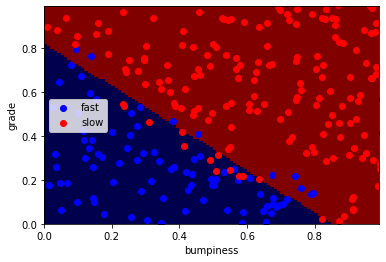

In [28]:
clf = SVC(kernel="linear", gamma=1.0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

# C parameter

C:\Users\ariaq\OneDrive\桌面\study\ud120-projects-master\ud120-projects-master/choose_your_own\class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


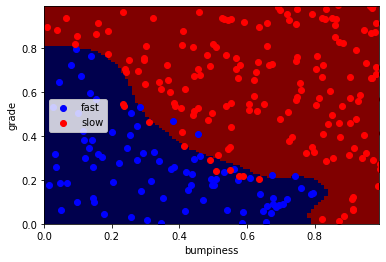

In [29]:
clf = SVC(kernel="rbf", C=10**5)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

# Gamma parameter

C:\Users\ariaq\OneDrive\桌面\study\ud120-projects-master\ud120-projects-master/choose_your_own\class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


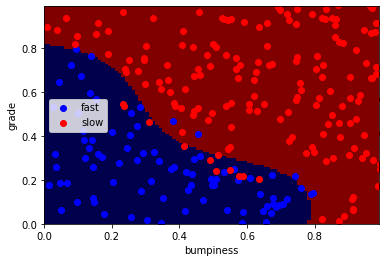

In [30]:
clf = SVC(kernel="rbf", gamma=10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

# Author ID Accuracy & Timing

In [59]:
#!/usr/bin/python3

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels

In [85]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_train, features_test, labels_train, labels_test = preprocess()
def my_svm(features_train, features_test, labels_train, labels_test, kernel='linear', C=1.0):
    # the classifier
    clf = SVC(kernel=kernel, C=C)

    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print("training time:", round(time()-t0, 3), "s")

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print("predicting time:", round(time()-t0, 3), "s")

    accuracy = accuracy_score(pred, labels_test)

    print('accuracy = {0}'.format(accuracy))
    return pred

pred = my_svm(features_train, features_test, labels_train, labels_test, kernel='linear', C=1)

No. of Chris training emails :  7936
No. of Sara training emails :  7884
training time: 75.281 s
predicting time: 7.299 s
accuracy = 0.9840728100113766


### smaller training set

In [86]:
features_train2 = features_train[:int(len(features_train)/100)]
labels_train2 = labels_train[:int(len(labels_train)/100)]
pred_linear = my_svm(features_train2,features_test,labels_train2,labels_test)

training time: 0.025 s
predicting time: 0.177 s
accuracy = 0.8845278725824801


In [87]:
pred_rbf = my_svm(features_train, features_test, labels_train, labels_test, 'rbf', C=1)

training time: 98.528 s
predicting time: 14.25 s
accuracy = 0.9926052332195677


In [88]:
features_train2 = features_train[:int(len(features_train)/100)] 
labels_train2 = labels_train[:int(len(labels_train)/100)] 

pred = my_svm(features_train2, features_test, labels_train2, labels_test,kernel = 'rbf', C=1)

training time: 0.022 s
predicting time: 0.482 s
accuracy = 0.8953356086461889


In [90]:
for C in [10.,100.,1000.,10000.]:
    print("C=", C)
    pred = my_svm(features_train2, features_test, labels_train2, labels_test, kernel = 'rbf', C=C)

C= 10.0
training time: 0.021 s
predicting time: 0.481 s
accuracy = 0.8998862343572241
C= 100.0
training time: 0.019 s
predicting time: 0.48 s
accuracy = 0.8998862343572241
C= 1000.0
training time: 0.02 s
predicting time: 0.486 s
accuracy = 0.8998862343572241
C= 10000.0
training time: 0.019 s
predicting time: 0.486 s
accuracy = 0.8998862343572241


In [91]:
pred[10],pred[26],pred[50]

(1, 0, 1)

In [95]:
print(sum(pred))

931


In [96]:
sum(clf.predict(features_test) ==1)

963